In [2]:
import json

file_path = '/Users/dimitrygrebenyuk/Documents/GitHub/world-regions/countries+states+cities.json'

# Open the file and load the JSON content
with open(file_path, 'r') as file:
    data = json.load(file)

coordinates = [
    (float(state["longitude"]), float(state["latitude"]))
    for country in data
    for state in country["states"]
    if state["longitude"] is not None and state["latitude"] is not None
]

/var/folders/fn/qy43ms456qsbn_ps1008ly540000gn/T/ipykernel_3141/2009662996.py:17: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/var/folders/fn/qy43ms456qsbn_ps1008ly540000gn/T/ipykernel_3141/2009662996.py:20: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  voronoi_clipped = gpd.overlay(voronoi_gdf, world, how='intersection')


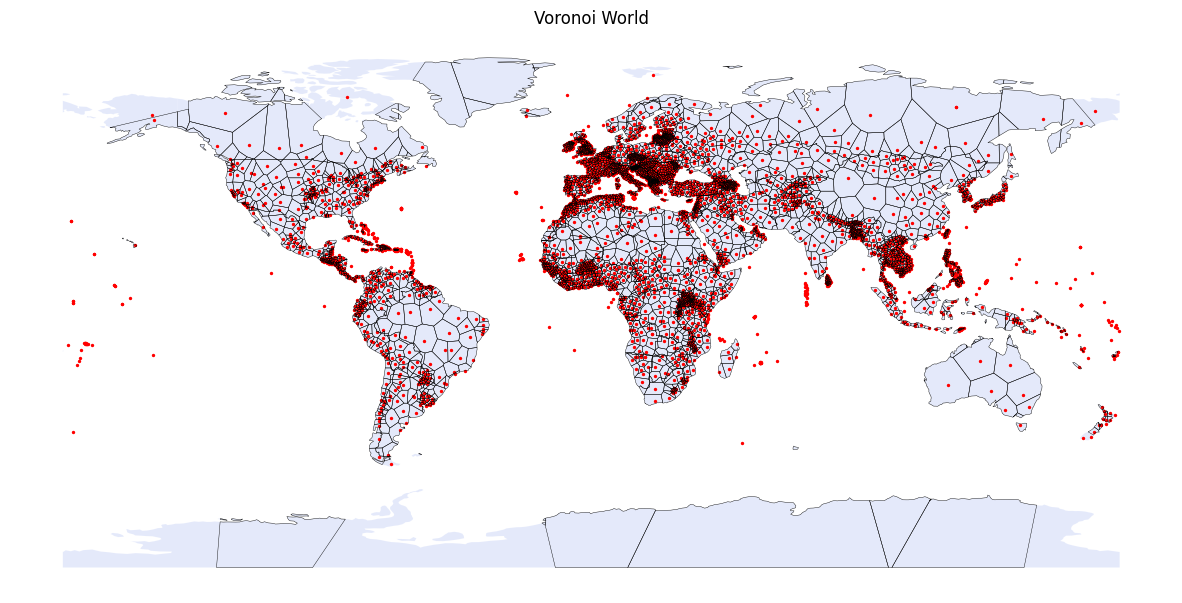

In [21]:
from scipy.spatial import Voronoi
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

# Create Voronoi polygons
vor = Voronoi(coordinates)
polygons = [
    Polygon(vor.vertices[v]).intersection(Polygon([(-180, -90), (-180, 90), (180, 90), (180, -90)]))
    for v in vor.regions
    if -1 not in v and v
]
voronoi_gdf = gpd.GeoDataFrame(geometry=polygons)

# Load world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Clip Voronoi polygons to land boundaries
voronoi_clipped = gpd.overlay(voronoi_gdf, world, how='intersection')

# Plot the world map without internal state borders
ax = world.plot(figsize=(15, 10), color='#cbd5f7', alpha=0.5)

# Plot the clipped Voronoi polygons with very thin borders
voronoi_clipped.boundary.plot(ax=ax, color='black', linewidth=0.3)  # Adjust line width with 'linewidth'

# Plot the center points as red dots
x_coords, y_coords = zip(*coordinates)
plt.scatter(x_coords, y_coords, color='red', s=2)

# Optional: Add other customizations
plt.title('Voronoi World')
plt.axis('off')

plt.show()
